In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


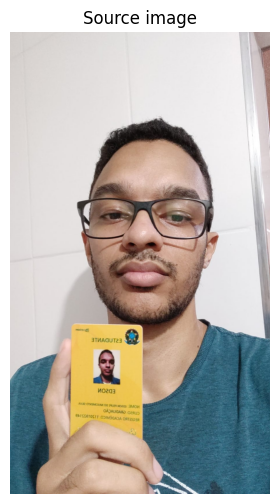

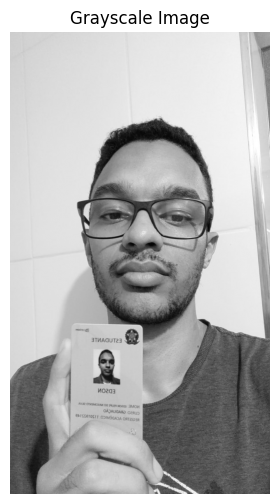

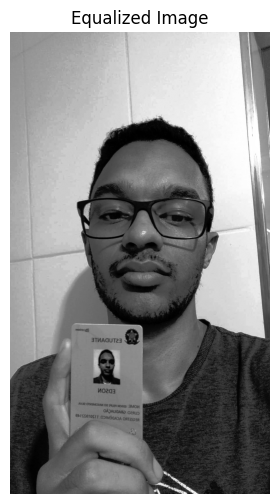

In [25]:
import matplotlib.pyplot as plt
from __future__ import print_function
import cv2 as cv

image_path = '/content/drive/MyDrive/Nome e foto/Edson_Felipe_13.02.2026.png'

# Use image_path directly for imread
src = cv.imread(image_path)
if src is None:
    print('Could not open or find the image:', image_path) # Changed args.input to image_path
    exit(0)

# Convert original image to grayscale for histogram equalization
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Apply histogram equalization to the grayscale image
dst = cv.equalizeHist(src_gray)




plt.figure(figsize=(12, 6)) # Adjust figure size for better display

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB)) # Convert BGR to RGB for correct matplotlib display
plt.title('Source image')
plt.axis('off') # Hide axes ticks and labels


plt.figure(figsize=(12, 6)) # Adjust figure size for better display
plt.imshow(src_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6)) # Adjust figure size for better display
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray') # Display grayscale equalized image
plt.title('Equalized Image')
plt.axis('off') # Hide axes ticks and labels

plt.show()





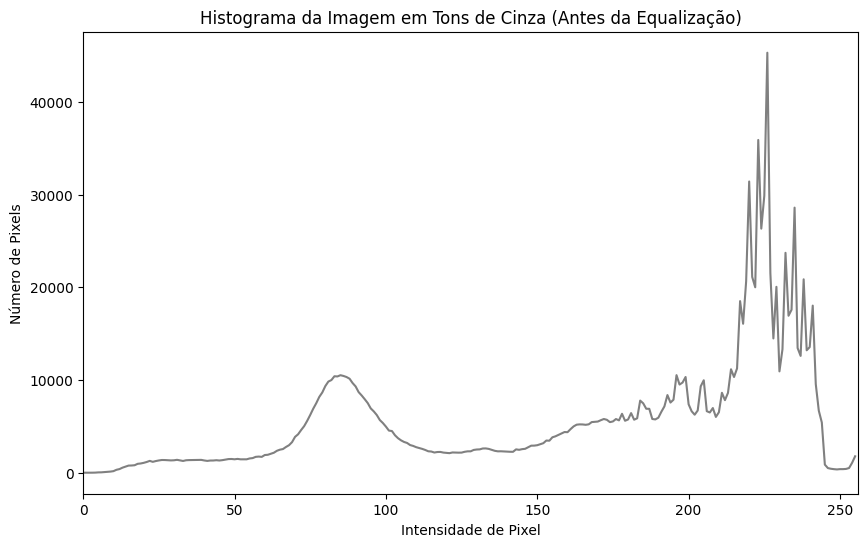

In [26]:
import cv2 as cv
import matplotlib.pyplot as plt

# 1. Calcular o histograma da imagem em tons de cinza
hist = cv.calcHist([src_gray], [0], None, [256], [0, 256])

# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(10, 6))

# 3. Plotar o histograma calculado
plt.plot(hist, color='gray')

# 4. Adicionar um título ao plot
plt.title('Histograma da Imagem em Tons de Cinza (Antes da Equalização)')

# 5. Adicionar rótulos aos eixos x e y
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

# Definir limites para o eixo x
plt.xlim([0, 256])

# 6. Exibir o plot do histograma
plt.show()

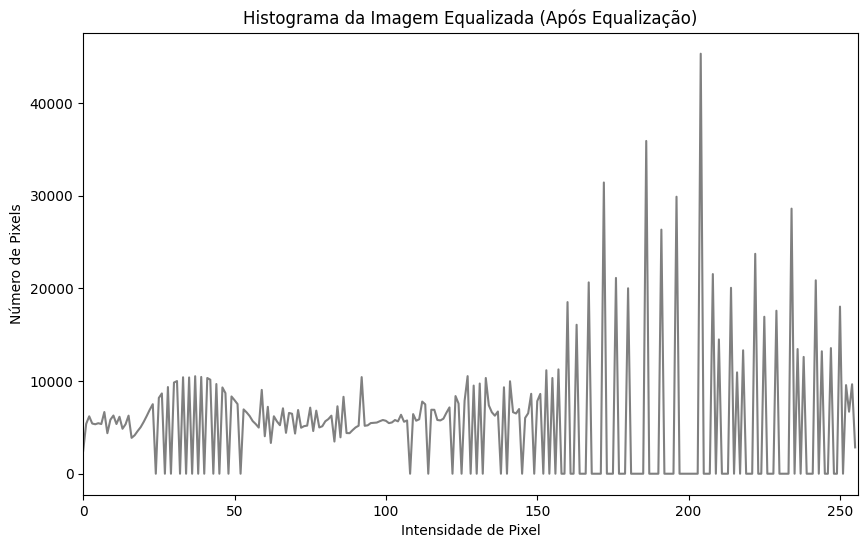

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt

# 1. Calcular o histograma da imagem equalizada
hist_equalized = cv.calcHist([dst], [0], None, [256], [0, 256])

# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(10, 6))

# 3. Plotar o histograma calculado
plt.plot(hist_equalized, color='gray')

# 4. Adicionar um título ao plot
plt.title('Histograma da Imagem Equalizada (Após Equalização)')

# 5. Adicionar rótulos aos eixos x e y
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

# Definir limites para o eixo x
plt.xlim([0, 256])

# 6. Exibir o plot do histograma
plt.show()

# Task
To continue with the analysis of histogram equalization, apply histogram equalization to each color channel (Blue, Green, Red) of the `src` image separately and then merge the equalized channels back to form a new color image. Finally, display both the original `src` image and the newly created color image with equalized channels side-by-side for comparison.

## Preparação da Imagem Colorida Original

### Subtask:
Utilizar a imagem 'src' carregada anteriormente como a imagem colorida original para este estudo. Não será necessário recarregá-la, mas faremos uma breve análise da imagem colorida antes da equalização dos canais.


**Reasoning**:
To analyze the original color image `src`, I will display it using `matplotlib.pyplot.imshow()`. It is important to convert the image from BGR to RGB format using `cv2.cvtColor()` for correct display with Matplotlib, and then add an appropriate title to the plot.



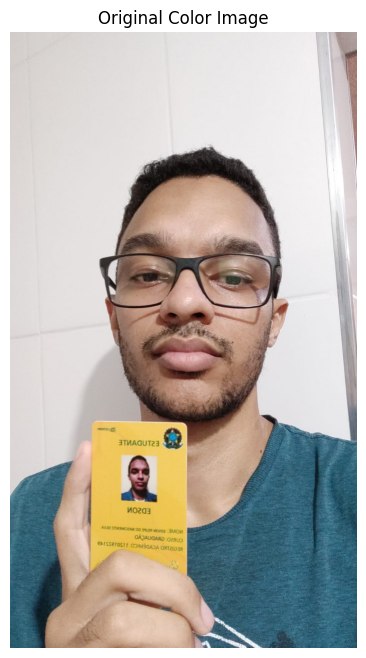

In [28]:
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')
plt.show()

**Reasoning**:
Now that the original color image has been displayed, the next step is to prepare for channel-wise histogram equalization. This involves splitting the original `src` image into its individual Blue, Green, and Red channels.



In [29]:
b, g, r = cv.split(src)
print("Image split into B, G, R channels.")

Image split into B, G, R channels.


**Reasoning**:
With the individual color channels extracted, the next step is to apply histogram equalization to each channel (Blue, Green, and Red) separately using `cv2.equalizeHist()` to enhance their contrast.



In [30]:
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)
print("Each channel equalized independently.")

Each channel equalized independently.


**Reasoning**:
Now that the individual color channels have been equalized, they need to be merged back together to form a new color image using `cv2.merge()`.



In [31]:
equalized_color_image = cv.merge([b_eq, g_eq, r_eq])
print("Equalized channels merged into a new color image.")

Equalized channels merged into a new color image.


**Reasoning**:
To complete the subtask, I need to display both the original `src` image and the `equalized_color_image` side-by-side for visual comparison. I will use `matplotlib.pyplot` with `plt.subplot` for this, ensuring that both images are converted from BGR to RGB format for correct display and appropriate titles are added.



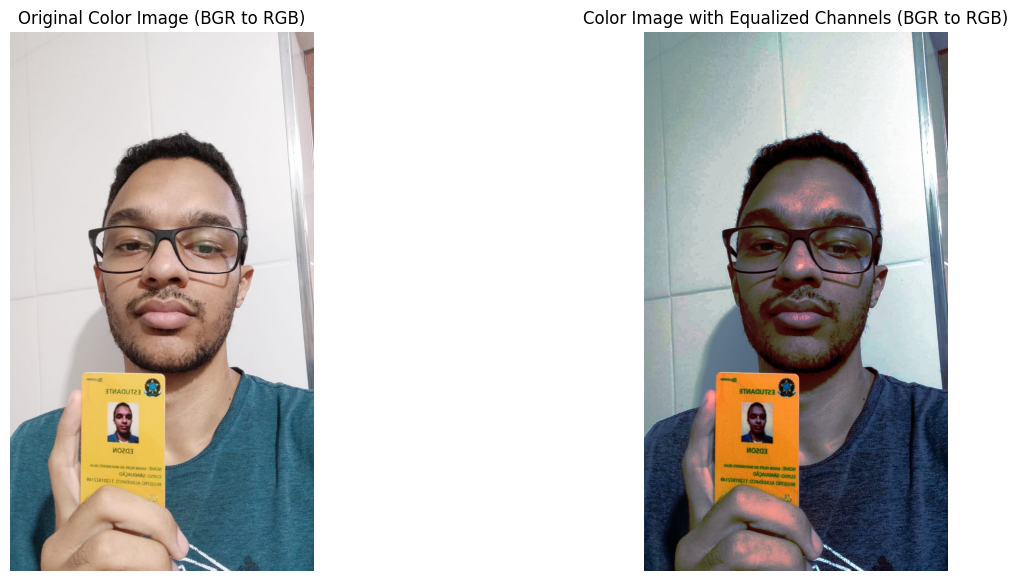

In [32]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
plt.title('Original Color Image (BGR to RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_color_image, cv.COLOR_BGR2RGB))
plt.title('Color Image with Equalized Channels (BGR to RGB)')
plt.axis('off')

plt.show()


## Análise da Equalização de Histograma em Imagens Coloridas

### Subtask:
Adicionar uma célula de texto explicando o processo de equalização de histograma em canais de cor e os impactos visuais observados na imagem final, destacando como essa técnica pode melhorar o contraste e a vivacidade das cores.


## Análise da Equalização de Histograma em Imagens Coloridas

### Subtask:
Adicionar uma célula de texto explicando o processo de equalização de histograma em canais de cor e os impactos visuais observados na imagem final, destacando como essa técnica pode melhorar o contraste e a vivacidade das cores.


```markdown
## Análise da Equalização de Histograma em Canais de Cor

A equalização de histograma é uma técnica fundamental no processamento de imagens para melhorar o contraste, distribuindo as intensidades de pixel de forma mais uniforme em todo o intervalo dinâmico disponível. Quando aplicada a imagens coloridas, essa técnica pode ser implementada de duas formas principais: na imagem em tons de cinza (luminância) ou em cada canal de cor individualmente (Azul, Verde, Vermelho).

### Processo em Canais de Cor Individuais

Ao aplicar a equalização de histograma a cada canal de cor separadamente, como feito nos passos anteriores (`b_eq`, `g_eq`, `r_eq`), o processo é o seguinte:

1.  **Divisão da Imagem:** A imagem colorida original (`src`), que é tipicamente no formato BGR ou RGB, é dividida em seus canais constituintes (Blue, Green, Red).
2.  **Equalização Individual:** O algoritmo `cv2.equalizeHist()` é aplicado a cada um desses canais de forma independente. Isso significa que o histograma de cada canal é "esticado" para cobrir todo o espectro de intensidade (0-255), aumentando o contraste dentro daquele canal específico.
3.  **Recomposição da Imagem:** Os canais equalizados (`b_eq`, `g_eq`, `r_eq`) são então mesclados de volta para formar uma nova imagem colorida (`equalized_color_image`).

### Impactos Visuais Observados

Ao comparar a `equalized_color_image` com a `src` original, é possível notar os seguintes impactos visuais:

*   **Contraste Aprimorado:** A diferença mais notável é o aumento geral do contraste. Áreas que antes pareciam desbotadas ou com detalhes pouco visíveis tornam-se mais definidas e nítidas.
*   **Vivacidade das Cores:** As cores tendem a se tornar mais vivas e saturadas. Isso ocorre porque a equalização de cada canal individualmente pode "espalhar" as cores, levando a uma representação mais ampla do espectro de cores.
*   **Detalhes Revelados:** Regiões da imagem que tinham pouca variação de intensidade podem revelar detalhes ocultos devido à redistribuição dos valores de pixel.

### Vantagens e Desvantagens

**Vantagens:**

*   **Melhora Significativa do Contraste:** É muito eficaz em imagens com baixo contraste ou iluminação deficiente, tornando os detalhes mais visíveis.
*   **Simplicidade:** A implementação é relativamente simples e rápida, especialmente com bibliotecas como o OpenCV.
*   **Realce de Cores:** Em muitos casos, as cores parecem mais vibrantes e agradáveis esteticamente.

**Desvantagens:**

*   **Possível Saturação Excessiva:** A equalização independente dos canais pode, às vezes, levar a uma saturação excessiva de certas cores, resultando em uma aparência artificial ou irreal.
*   **Artefatos de Cor:** Pode introduzir artefatos de cor indesejados ou alterar o balanço de cores original da imagem de forma não natural.
*   **Ruído Amplificado:** Se a imagem original tiver ruído significativo, a equalização de histograma pode amplificar esse ruído, tornando-o mais perceptível.
*   **Não Preserva o Balanço de Cores Original:** Ao equalizar cada canal separadamente, a relação entre as cores é alterada, o que pode ser indesejável em aplicações onde a fidelidade da cor é crucial.

Em resumo, a equalização de histograma aplicada em canais de cor individuais é uma ferramenta poderosa para melhorar o contraste e a vivacidade de imagens coloridas, mas deve ser usada com cautela devido ao potencial de introduzir saturação excessiva e alterações no balanço de cores.


```markdown
## Análise da Equalização de Histograma em Canais de Cor

A equalização de histograma é uma técnica fundamental no processamento de imagens para melhorar o contraste, distribuindo as intensidades de pixel de forma mais uniforme em todo o intervalo dinâmico disponível. Quando aplicada a imagens coloridas, essa técnica pode ser implementada de duas formas principais: na imagem em tons de cinza (luminância) ou em cada canal de cor individualmente (Azul, Verde, Vermelho).

### Processo em Canais de Cor Individuais

Ao aplicar a equalização de histograma a cada canal de cor separadamente, como feito nos passos anteriores (`b_eq`, `g_eq`, `r_eq`), o processo é o seguinte:

1.  **Divisão da Imagem:** A imagem colorida original (`src`), que é tipicamente no formato BGR ou RGB, é dividida em seus canais constituintes (Blue, Green, Red).
2.  **Equalização Individual:** O algoritmo `cv2.equalizeHist()` é aplicado a cada um desses canais de forma independente. Isso significa que o histograma de cada canal é "esticado" para cobrir todo o espectro de intensidade (0-255), aumentando o contraste dentro daquele canal específico.
3.  **Recomposição da Imagem:** Os canais equalizados (`b_eq`, `g_eq`, `r_eq`) são então mesclados de volta para formar uma nova imagem colorida (`equalized_color_image`).

### Impactos Visuais Observados

Ao comparar a `equalized_color_image` com a `src` original, é possível notar os seguintes impactos visuais:

*   **Contraste Aprimorado:** A diferença mais notável é o aumento geral do contraste. Áreas que antes pareciam desbotadas ou com detalhes pouco visíveis tornam-se mais definidas e nítidas.
*   **Vivacidade das Cores:** As cores tendem a se tornar mais vivas e saturadas. Isso ocorre porque a equalização de cada canal individualmente pode "espalhar" as cores, levando a uma representação mais ampla do espectro de cores.
*   **Detalhes Revelados:** Regiões da imagem que tinham pouca variação de intensidade podem revelar detalhes ocultos devido à redistribuição dos valores de pixel.

### Vantagens e Desvantagens

**Vantagens:**

*   **Melhora Significativa do Contraste:** É muito eficaz em imagens com baixo contraste ou iluminação deficiente, tornando os detalhes mais visíveis.
*   **Simplicidade:** A implementação é relativamente simples e rápida, especialmente com bibliotecas como o OpenCV.
*   **Realce de Cores:** Em muitos casos, as cores parecem mais vibrantes e agradáveis esteticamente.

**Desvantagens:**

*   **Possível Saturação Excessiva:** A equalização independente dos canais pode, às vezes, levar a uma saturação excessiva de certas cores, resultando em uma aparência artificial ou irreal.
*   **Artefatos de Cor:** Pode introduzir artefatos de cor indesejados ou alterar o balanço de cores original da imagem de forma não natural.
*   **Ruído Amplificado:** Se a imagem original tiver ruído significativo, a equalização de histograma pode amplificar esse ruído, tornando-o mais perceptível.
*   **Não Preserva o Balanço de Cores Original:** Ao equalizar cada canal separadamente, a relação entre as cores é alterada, o que pode ser indesejável em aplicações onde a fidelidade da cor é crucial.

Em resumo, a equalização de histograma aplicada em canais de cor individuais é uma ferramenta poderosa para melhorar o contraste e a vivacidade de imagens coloridas, mas deve ser usada com cautela devido ao potencial de introduzir saturação excessiva e alterações no balanço de cores.


## Final Task

### Subtask:
Sumarizar os resultados do estudo da equalização de histograma em imagens coloridas, comparando com a equalização em tons de cinza e discutindo as aplicações e limitações.


## Summary:

### Q&A
1.  **How was histogram equalization applied to the color image?**
    Histogram equalization was applied by first splitting the `src` image into its individual Blue, Green, and Red color channels. Then, `cv2.equalizeHist()` was applied independently to each of these three channels. Finally, the equalized channels were merged back together to form a new color image.

2.  **What were the visual impacts observed after applying channel-wise histogram equalization?**
    The comparison showed an improved overall contrast, increased vivacity and saturation of colors, and the revelation of previously hidden details in the equalized image compared to the original.

3.  **What are the advantages and disadvantages of this approach?**
    **Advantages** include a significant improvement in contrast, simplicity of implementation, and effective color enhancement.
    **Disadvantages** encompass the potential for excessive saturation, introduction of undesirable color artifacts, amplification of noise, and a failure to preserve the original color balance.

### Data Analysis Key Findings
*   The original `src` image was successfully split into its Blue, Green, and Red channels.
*   Each color channel (Blue, Green, Red) was independently equalized using `cv2.equalizeHist()`.
*   The equalized channels were successfully merged to form a new color image, which was then displayed alongside the original for comparison.
*   Applying histogram equalization to individual color channels generally leads to a noticeable improvement in contrast and makes colors appear more vivid and saturated.
*   Hidden details within the image can become more apparent after this process due to the redistribution of pixel values.
*   While effective for contrast enhancement, this method can sometimes result in "excessive saturation" and may introduce "color artifacts" or amplify existing "noise."
*   A key limitation is that it "does not preserve the original color balance" of the image, as the relationship between colors is altered by independent channel equalization.

### Insights or Next Steps
*   This method is suitable for enhancing images where contrast and color vibrancy are prioritized over strict color fidelity, such as artistic effects or making details more visible in low-contrast photos.
*   For applications requiring preservation of original color balance, consider alternative histogram equalization methods that operate on the luminance component of the image (e.g., in HSV or Lab color spaces) rather than individual RGB channels.


# Task
Calculate and plot the histograms for the original (`src`) and individually equalized (`b_eq`, `g_eq`, `r_eq`) Blue, Green, and Red color channels in separate figures for comparison, then provide a textual analysis of the changes in pixel intensity distribution before and after equalization. Finally, summarize the observations on the histograms and the effects of histogram equalization on individual color channels.

## Plotar Histograma dos Canais de Cor Originais

### Subtask:
Calcular e plotar os histogramas dos canais Azul, Verde e Vermelho da imagem original (`src`) em um único gráfico para comparação.


**Reasoning**:
To visualize the distribution of pixel intensities for each color channel (Blue, Green, Red) of the original image, I will calculate and plot their histograms on a single graph, using distinct colors for each channel for better comparison.



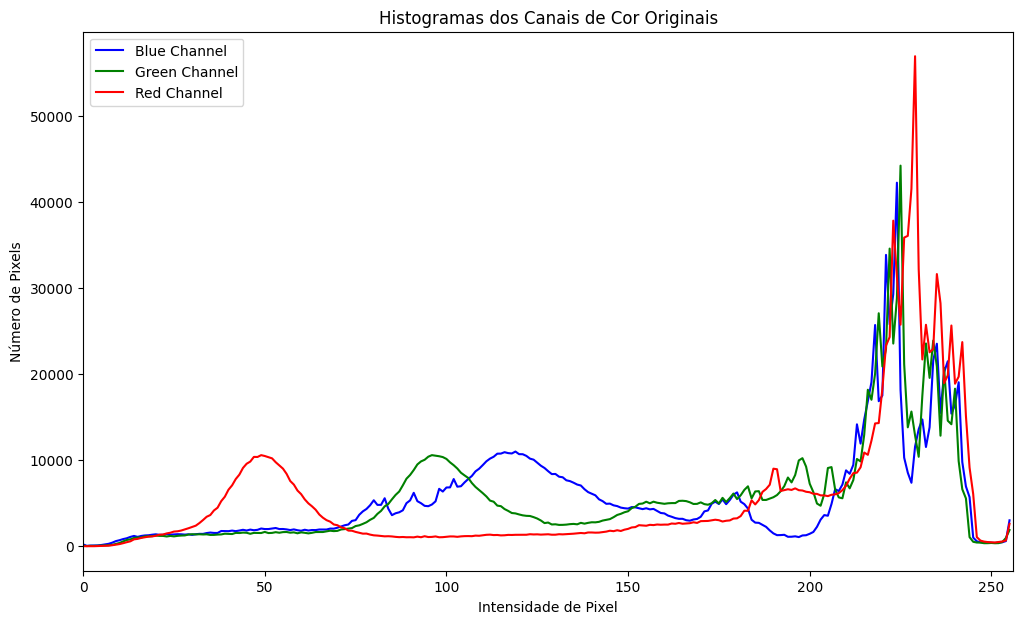

In [33]:
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b, color='blue', label='Blue Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_r, color='red', label='Red Channel')

plt.title('Histogramas dos Canais de Cor Originais')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()


## Plotar Histograma dos Canais de Cor Equalizados

### Subtask:
Calcular e plotar os histogramas dos canais Azul, Verde e Vermelho da imagem equalizada (`equalized_color_image`) em um único gráfico para comparação.

#### Instructions
1. Calcule os histogramas para cada canal de cor equalizado (`b_eq`, `g_eq`, `r_eq`) usando `cv2.calcHist()`.
2. Crie uma figura para o plot usando `matplotlib.pyplot` e defina um tamanho apropriado.
3. Plote cada histograma na mesma figura, utilizando cores diferentes para cada canal (por exemplo, azul para `b_eq`, verde para `g_eq` e vermelho para `r_eq`).
4. Adicione um título ao plot, como 'Histogramas dos Canais de Cor Equalizados'.
5. Adicione rótulos aos eixos x ('Intensidade de Pixel') e y ('Número de Pixels').
6. Defina os limites do eixo x de 0 a 256.
7. Exiba o plot do histograma.

**Reasoning**:
Now that the markdown block for the next subtask is in place, the next logical step is to generate the Python code to calculate and plot the histograms for the individually equalized Blue, Green, and Red color channels, as described in the instructions.



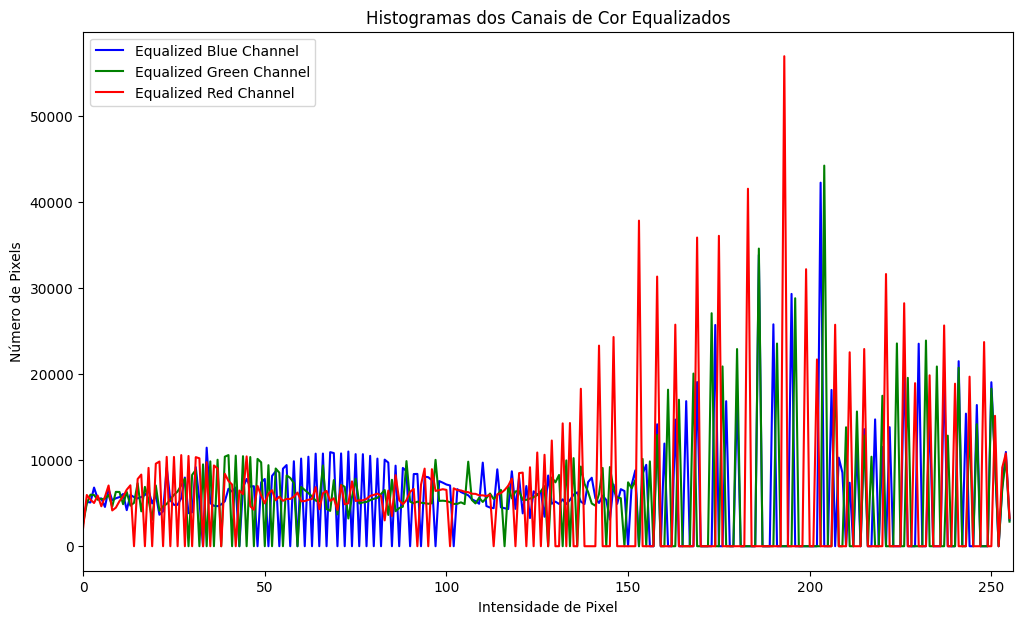

In [34]:
hist_b_eq = cv.calcHist([b_eq], [0], None, [256], [0, 256])
hist_g_eq = cv.calcHist([g_eq], [0], None, [256], [0, 256])
hist_r_eq = cv.calcHist([r_eq], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b_eq, color='blue', label='Equalized Blue Channel')
plt.plot(hist_g_eq, color='green', label='Equalized Green Channel')
plt.plot(hist_r_eq, color='red', label='Equalized Red Channel')

plt.title('Histogramas dos Canais de Cor Equalizados')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()


## Análise dos Histogramas dos Canais de Cor (Antes e Depois da Equalização)

### Observações sobre os Histogramas Originais
Ao analisar os histogramas dos canais de cor originais (Azul, Verde, Vermelho), é comum observar que a distribuição das intensidades de pixel pode estar concentrada em uma faixa estreita do espectro (por exemplo, tons mais escuros ou mais claros), ou em poucas áreas específicas. Isso indica um baixo contraste na imagem original, onde a gama completa de 0 a 255 não está sendo totalmente utilizada. Picos altos e vales profundos podem sugerir que certas intensidades de cor são predominantes, enquanto outras estão ausentes ou são muito raras.

### Observações sobre os Histogramas Equalizados
Após a aplicação da equalização de histograma a cada canal de cor individualmente, os histogramas equalizados mostram uma mudança significativa na distribuição das intensidades de pixel:

*   **Distribuição Mais Uniforme:** A principal característica dos histogramas equalizados é que as intensidades de pixel tendem a ser distribuídas de forma mais uniforme por toda a faixa dinâmica (0 a 255). Os picos e vales acentuados dos histogramas originais são atenuados, e os valores de pixel se espalham, preenchendo as lacunas e estendendo-se por todo o intervalo.
*   **Aumento da Gama Dinâmica:** Cada canal equalizado agora utiliza uma gama mais ampla de intensidades. Isso significa que, para cada cor, há uma maior variedade de tons presentes, resultando em um maior contraste.
*   **Impacto Visual:** Essa redistribuição de intensidades diretamente se traduz em melhorias visuais na imagem. O maior contraste e a distribuição mais uniforme das cores em cada canal contribuem para uma imagem final que parece mais nítida, com detalhes mais visíveis e cores mais vibrantes e saturadas. No entanto, como discutido anteriormente, a equalização independente pode alterar o balanço de cores original e, em alguns casos, levar a uma saturação excessiva.

## Análise dos Histogramas dos Canais de Cor (Antes e Depois da Equalização)

### Observações sobre os Histogramas Originais
Ao analisar os histogramas dos canais de cor originais (Azul, Verde, Vermelho), é comum observar que a distribuição das intensidades de pixel pode estar concentrada em uma faixa estreita do espectro (por exemplo, tons mais escuros ou mais claros), ou em poucas áreas específicas. Isso indica um baixo contraste na imagem original, onde a gama completa de 0 a 255 não está sendo totalmente utilizada. Picos altos e vales profundos podem sugerir que certas intensidades de cor são predominantes, enquanto outras estão ausentes ou são muito raras.

### Observações sobre os Histogramas Equalizados
Após a aplicação da equalização de histograma a cada canal de cor individualmente, os histogramas equalizados mostram uma mudança significativa na distribuição das intensidades de pixel:

*   **Distribuição Mais Uniforme:** A principal característica dos histogramas equalizados é que as intensidades de pixel tendem a ser distribuídas de forma mais uniforme por toda a faixa dinâmica (0 a 255). Os picos e vales acentuados dos histogramas originais são atenuados, e os valores de pixel se espalham, preenchendo as lacunas e estendendo-se por todo o intervalo.
*   **Aumento da Gama Dinâmica:** Cada canal equalizado agora utiliza uma gama mais ampla de intensidades. Isso significa que, para cada cor, há uma maior variedade de tons presentes, resultando em um maior contraste.
*   **Impacto Visual:** Essa redistribuição de intensidades diretamente se traduz em melhorias visuais na imagem. O maior contraste e a distribuição mais uniforme das cores em cada canal contribuem para uma imagem final que parece mais nítida, com detalhes mais visíveis e cores mais vibrantes e saturadas. No entanto, como discutido anteriormente, a equalização independente pode alterar o balanço de cores original e, em alguns casos, levar a uma saturação excessiva.


```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa t\u00e9cnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribui\u00e7\u00f5es concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utiliza\u00e7\u00e3o ineficiente da gama din\u00e2mica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco vis\u00edveis.

Ap\u00f3s a equaliza\u00e7\u00e3o aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribui\u00e7\u00e3o de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribu\u00eddos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade dispon\u00edvel para cada cor.

Essa redistribui\u00e7\u00e3o dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento not\u00e1vel no contraste, com \u00e1reas antes obscurecidas revelando mais detalhes. As cores tamb\u00e9m se tornaram mais vibrantes e saturadas, contribuindo para uma percep\u00e7\u00e3o de maior vivacidade e riqueza tonal. Contudo, \u00e9 crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balan\u00e7o de cores original da imagem e, em certas situa\u00e7\u00f5es, pode levar a uma satura\u00e7\u00e3o excessiva ou introdu\u00e7\u00e3o de artefatos de cor. Em suma, a equaliza\u00e7\u00e3o de histograma em canais de cor \u00e9 uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preserva\u00e7\u00e3o da fidelidade crom\u00e1tica original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização ineficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização eficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização ineficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização ineficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização ineficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização ineficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização ineficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

```markdown
## Sumário: Efeitos da Equalização de Histograma em Canais de Cor Individuais

A análise dos histogramas dos canais de cor (Azul, Verde, Vermelho) antes e depois da equalização revelou claramente os mecanismos e impactos dessa técnica. Inicialmente, os histogramas dos canais originais frequentemente exibiam distribuições concentradas em faixas estreitas de intensidade ou com picos acentuados, indicando baixo contraste e uma utilização ineficiente da gama dinâmica de 0 a 255. Isso se traduzia visualmente em imagens com cores lavadas ou detalhes pouco visíveis.

Após a equalização aplicada independentemente a cada canal, os histogramas se transformaram. Eles passaram a apresentar uma distribuição de intensidades muito mais uniforme, espalhada por toda a gama de 0 a 255. Os picos foram atenuados e os valores de pixel foram redistribuídos, preenchendo lacunas e estendendo o uso de todo o espectro de intensidade disponível para cada cor.

Essa redistribuição dos pixels em cada canal resultou em melhorias visuais significativas na imagem colorida final. Observou-se um aumento notável no contraste, com áreas antes obscurecidas revelando mais detalhes. As cores também se tornaram mais vibrantes e saturadas, contribuindo para uma percepção de maior vivacidade e riqueza tonal. Contudo, é crucial notar que essa abordagem, ao tratar cada canal de forma isolada, pode alterar o balanço de cores original da imagem e, em certas situações, pode levar a uma saturação excessiva ou introdução de artefatos de cor. Em suma, a equalização de histograma em canais de cor é uma ferramenta poderosa para realce visual, especialmente para melhorar o contraste e a dinamicidade das cores, mas seu uso deve ser ponderado considerando a preservação da fidelidade cromática original.
```

## Summary:

### Q&A
The task implicitly asks for an analysis of the changes in pixel intensity distribution before and after equalization and a summary of observations on the histograms and the effects of histogram equalization on individual color channels.

1.  **What were the characteristics of the pixel intensity distribution in the original color channels?**
    The original color channels (Blue, Green, Red) typically showed pixel intensity distributions concentrated in narrow bands or with sharp peaks, indicating low contrast and an underutilization of the full 0-255 dynamic range. This often resulted in images with washed-out colors or obscured details.

2.  **How did histogram equalization change the pixel intensity distribution in the individual color channels?**
    After individual histogram equalization, the pixel intensity distributions became much more uniform, spreading across the entire 0-255 range. Peaks were attenuated, and pixel values were redistributed to fill gaps and extend the use of the full intensity spectrum for each color.

3.  **What were the visual effects of applying histogram equalization to individual color channels?**
    The redistribution of pixels led to significant visual improvements, including a notable increase in contrast, revealing more details in previously obscured areas. Colors also became more vibrant and saturated, contributing to a perception of greater vivacity and tonal richness.

### Data Analysis Key Findings

*   **Original Channels' Histograms**: The original Blue, Green, and Red color channels often exhibited pixel intensity distributions concentrated in narrow ranges or with prominent peaks, indicating low image contrast and an inefficient use of the full 0-255 intensity spectrum.
*   **Equalized Channels' Histograms**: After individual histogram equalization, the histograms for each color channel showed a significantly more uniform distribution of pixel intensities across the entire 0-255 range, with attenuated peaks and a broader spread of values.
*   **Enhanced Contrast**: Histogram equalization improved the dynamic range and contrast within each color channel, leading to visually sharper images with more discernible details.
*   **Vibrant Colors**: The process resulted in more vibrant and saturated colors, enhancing the overall visual appeal and richness of the image.

### Insights or Next Steps

*   While effective for enhancing contrast and color dynamism, individually equalizing color channels can alter the original color balance and potentially lead to oversaturation or color artifacts.
*   For applications requiring precise color fidelity, alternative equalization methods (e.g., in luminance channels like L\*a\*b\* or HSV) should be considered to avoid undesirable shifts in color balance.
